In [1]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<Axes: >

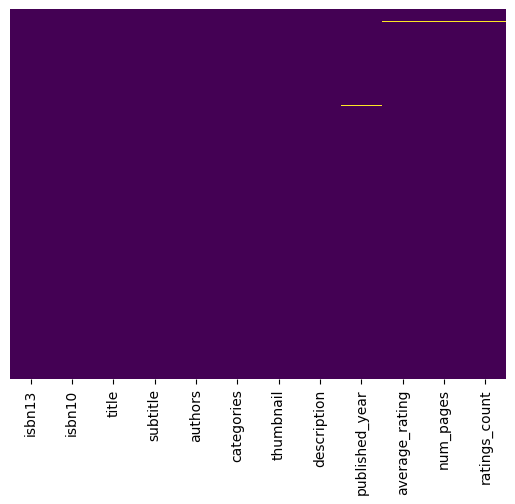

In [3]:
df = pd.read_json("books copy.json")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

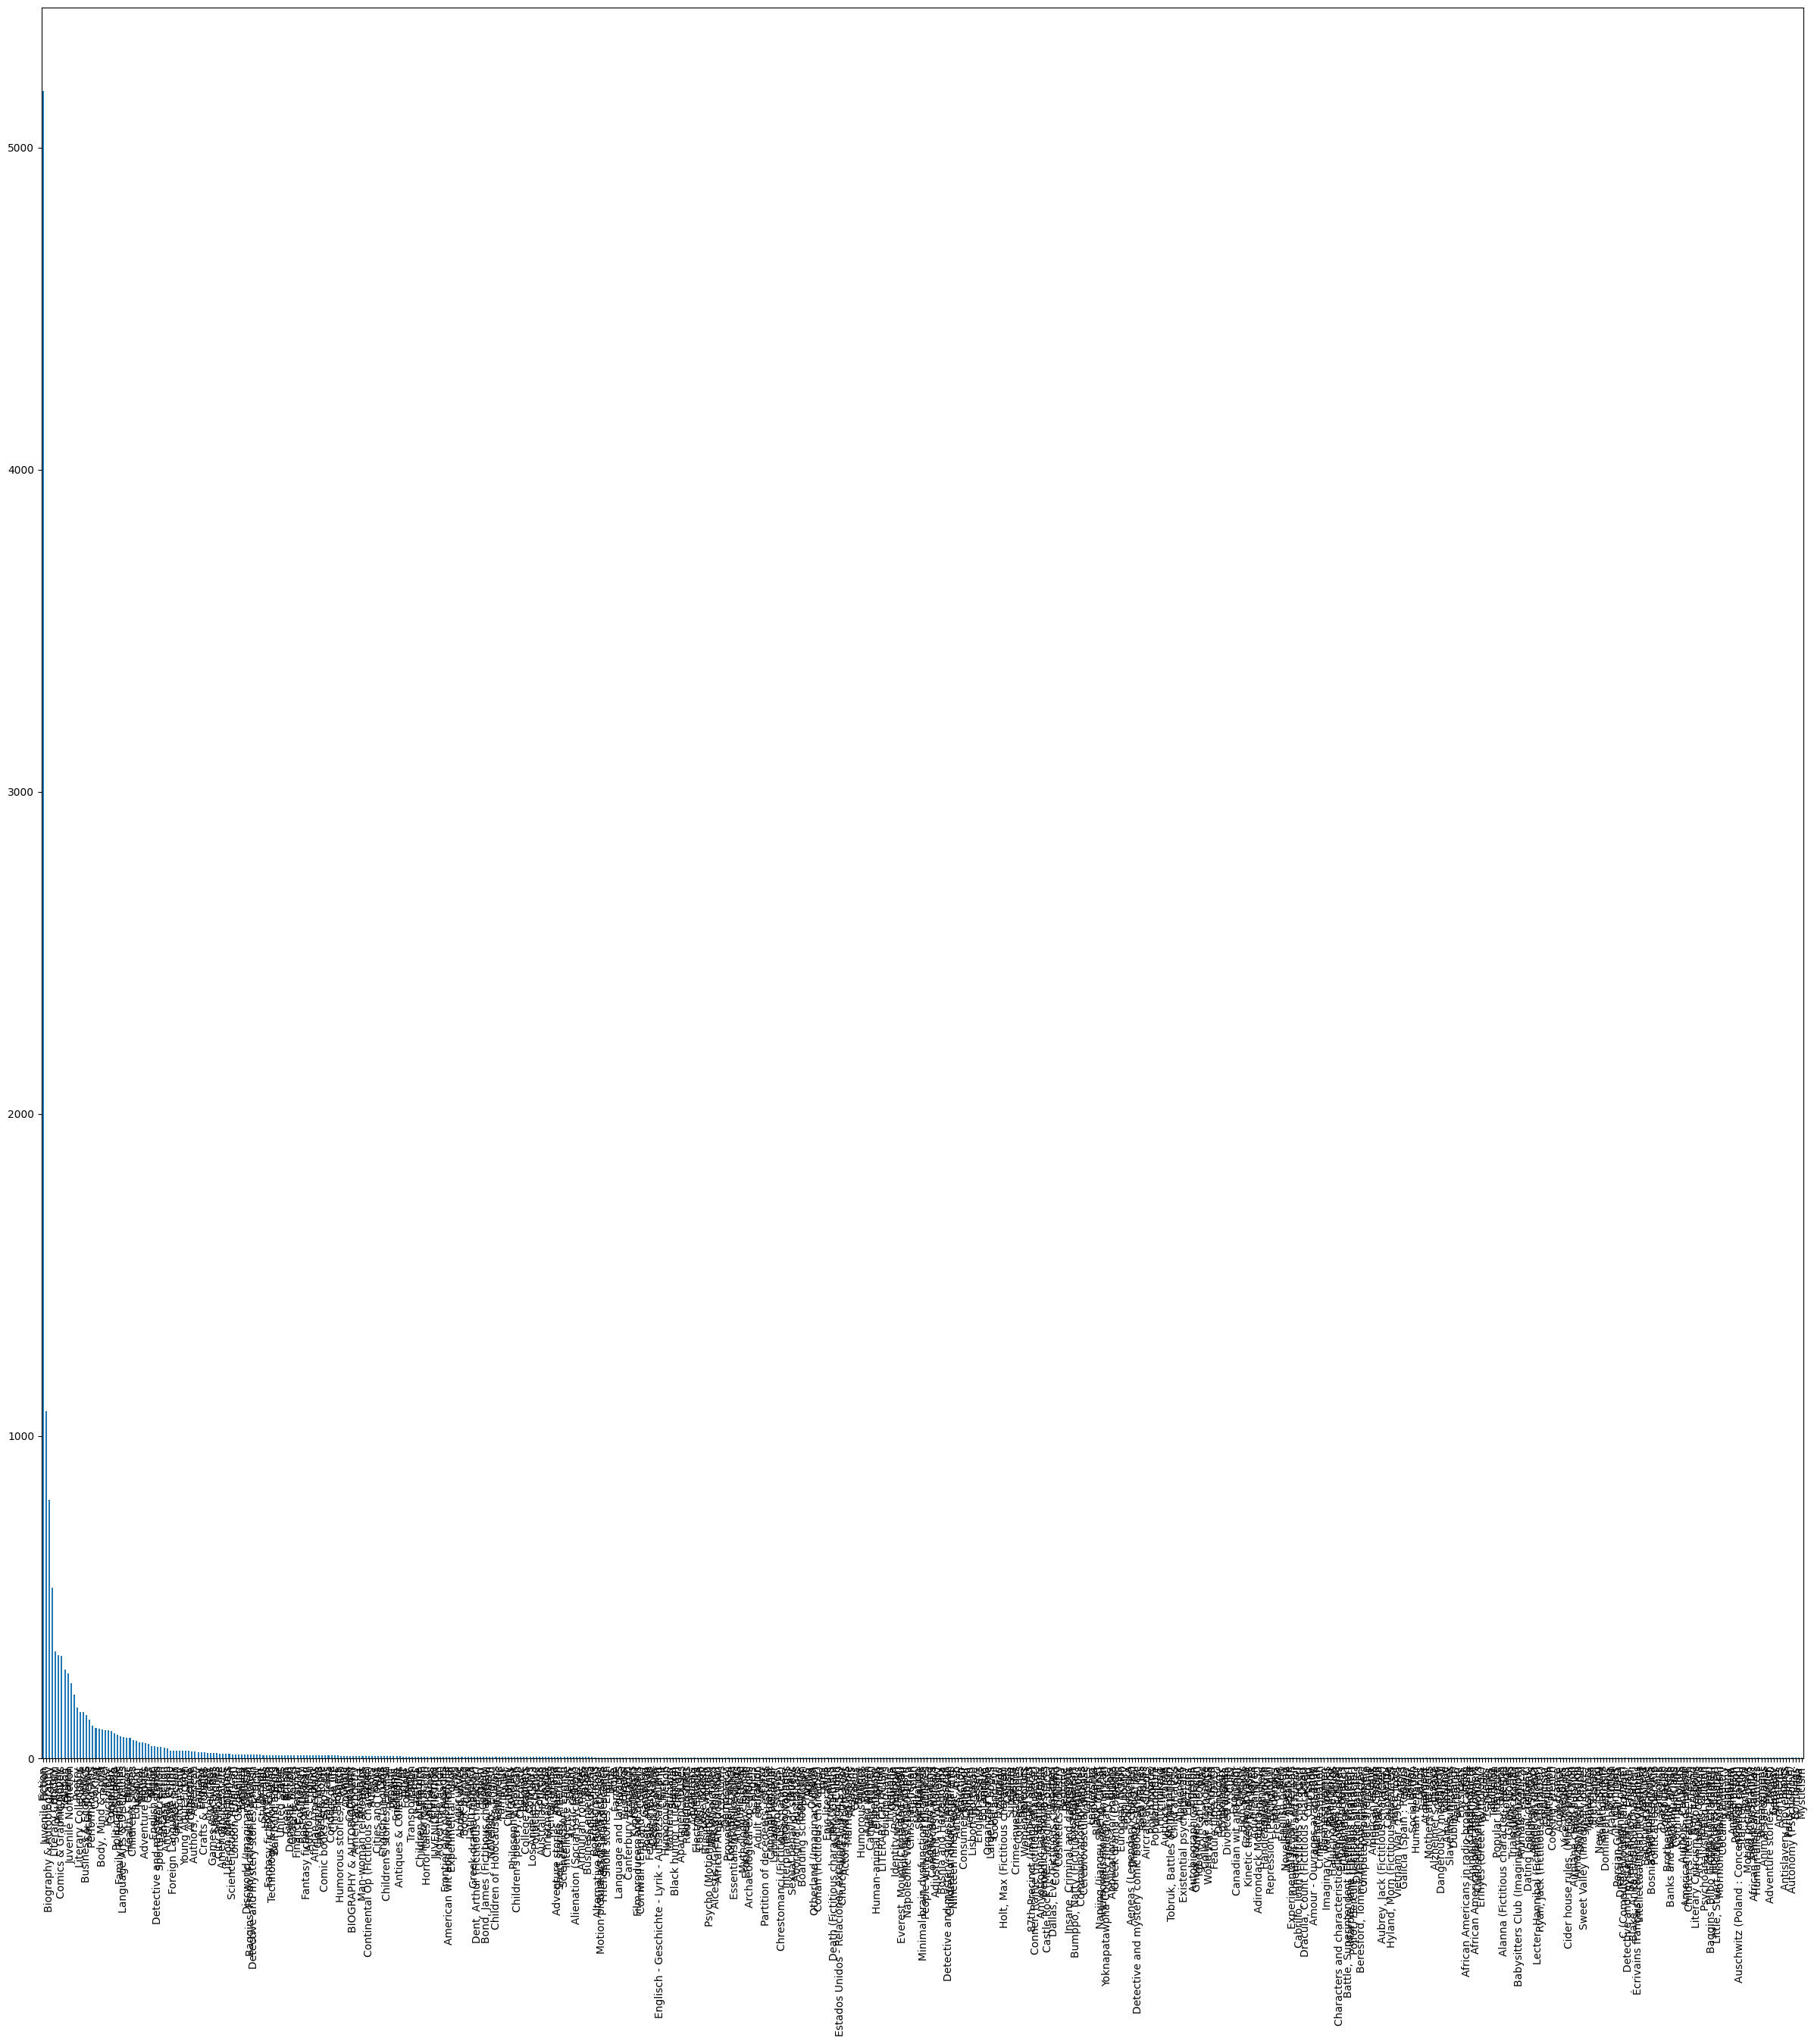

In [4]:
df['categories'].value_counts().plot( kind='bar', figsize=(30,30))

In [5]:
df['categories'].value_counts()

Fiction                      5176
Juvenile Fiction             1076
Biography & Autobiography     802
History                       528
Literary Criticism            332
                             ... 
Paris (France)                  2
Autonomy (Psychology).          2
Bombings                        2
India                           2
Mysticism                       2
Name: categories, Length: 568, dtype: int64

In [6]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [7]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,1.362000e+04,13608.000000,13534.000000,13534.000000,1.353400e+04
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068688e+08,10.483872,0.331339,242.367827,1.376156e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.993250e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [8]:
df.isna().sum()

isbn13             0
isbn10             0
title              0
subtitle           0
authors            0
categories         0
thumbnail          0
description        0
published_year    12
average_rating    86
num_pages         86
ratings_count     86
dtype: int64

In [9]:
df.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


In [10]:
df['categories'].unique()

array(['Fiction', 'Detective and mystery stories', 'American fiction',
       'Christian life', 'Authors, English', 'Africa, East',
       'Hyland, Morn (Fictitious character)', 'Adventure stories',
       'Arthurian romances', 'Fantasy fiction', '', 'English drama',
       'Country life', 'English fiction', 'Clergy',
       'Aubrey, Jack (Fictitious character)',
       'Detective and mystery stories, English', 'Black Death',
       'Human cloning', 'Science fiction', 'Great Britain',
       'American essays', 'China', 'Capitalism', 'Ireland',
       'Juvenile Fiction', "Children's stories, English",
       'Male friendship', 'Literary Collections',
       'Beresford, Tommy (Fictitious character)',
       'Imaginary wars and battles', 'Dysfunctional families',
       'Poirot, Hercule (Fictitious character)', 'Christmas stories',
       'Marple, Jane (Fictitious character)', 'Belgians',
       'Battle, Superintendent (Fictitious character)',
       'Baggins, Frodo (Fictitious character)

In [11]:

stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say', 'book', 'novel']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0
df['text'] = df['title']  +  " " + df['description']

df['text'] = df['text'].swifter.apply(clean_txt)
df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))


Pandas Apply:   0%|          | 0/13620 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13620 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13620 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13620 [00:00<?, ?it/s]

In [12]:
X = df[['text', 'polarity', 'subjectivity','len']]
y =df['categories']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y)
v = dict(zip(list(y), df['categories'].to_list()))


In [13]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [15]:
text_clf.fit(x_train['text'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [16]:
import numpy as np
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)
predicted = text_clf.predict(X_TEST)
c = 0

for doc, category in zip(X_TEST, predicted):
    
    if c == 2:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1 

-------------------------------------------------------
christians fall rome penguin bring work great thinkers pioneer radicals visionaries whose ideas shake civilization help penguins great ideas series feature twelve groundbreaking work historys prodigious thinkers volume beautifully package unique type drive design highlight bookmakers art offer great literature great package great price series ideal readers want explore savor great ideas shape world
Language Arts & Disciplines
-------------------------------------------------------
-------------------------------------------------------
realm possibility variety students high school describe ideas experience relationships series interconnect free verse stories
Juvenile Fiction
-------------------------------------------------------


In [17]:
np.mean(predicted == Y_TEST)

0.8311306901615272

In [18]:
docs_new = ['scary']
predicted = text_clf.predict(docs_new)
v[predicted[0]]

'Juvenile Fiction'